In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

plt.style.use("default")

sales = pd.read_csv("sales_train_validation.csv")
calendar = pd.read_csv("calendar.csv")
prices = pd.read_csv("sell_prices.csv")

print("Sales shape:", sales.shape)
print("Calendar shape:", calendar.shape)
print("Prices shape:", prices.shape)

Sales shape: (30490, 1919)
Calendar shape: (1969, 14)
Prices shape: (6841121, 4)


In [23]:
sales.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [24]:
sales_long = sales.melt(
    id_vars=[
        "id", "item_id", "dept_id",
        "cat_id", "store_id", "state_id"
    ],
    var_name="day",
    value_name="sales"
)

sales_long.head()

,id,item_id,dept_id,cat_id,store_id,state_id,day,sales
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0


In [25]:
calendar_subset = calendar[["d", "date"]]

sales_long = sales_long.merge(
    calendar_subset,
    left_on="day",
    right_on="d",
    how="left"
)

sales_long["date"] = pd.to_datetime(sales_long["date"])
sales_long.drop(columns=["d"], inplace=True)

sales_long.head()

,id,item_id,dept_id,cat_id,store_id,state_id,day,sales,date
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29


In [26]:
store_id = "CA_1"

store_sales = sales_long[sales_long["store_id"] == store_id]
print(store_sales.shape)

(5832737, 9)


In [27]:
daily_store_sales = (
    store_sales
    .groupby("date")["sales"]
    .sum()
    .reset_index()
    .sort_values("date")
)

daily_store_sales.head()

,date,sales
0,2011-01-29,4337
1,2011-01-30,4155
2,2011-01-31,2816
3,2011-02-01,3051
4,2011-02-02,2630


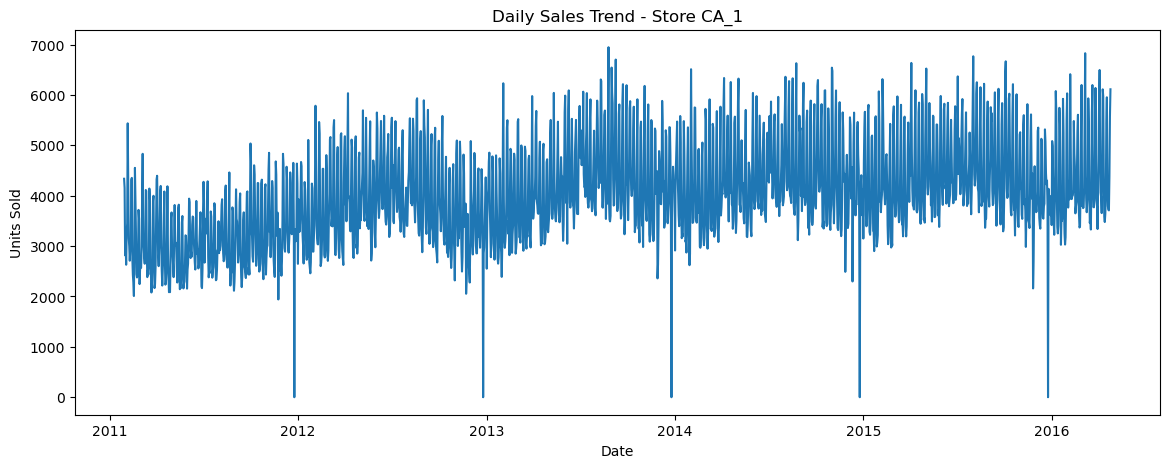

In [28]:
plt.figure(figsize=(14, 5))
plt.plot(daily_store_sales["date"], daily_store_sales["sales"])
plt.title(f"Daily Sales Trend - Store {store_id}")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.show()

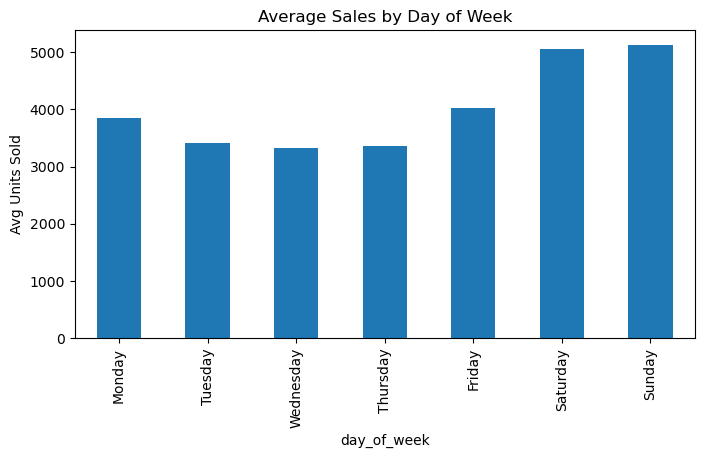

In [29]:
daily_store_sales["day_of_week"] = daily_store_sales["date"].dt.day_name()

weekly_avg = (
    daily_store_sales
    .groupby("day_of_week")["sales"]
    .mean()
    .reindex([
        "Monday", "Tuesday", "Wednesday",
        "Thursday", "Friday", "Saturday", "Sunday"
    ])
)

weekly_avg.plot(kind="bar", figsize=(8, 4))
plt.title("Average Sales by Day of Week")
plt.ylabel("Avg Units Sold")
plt.show()

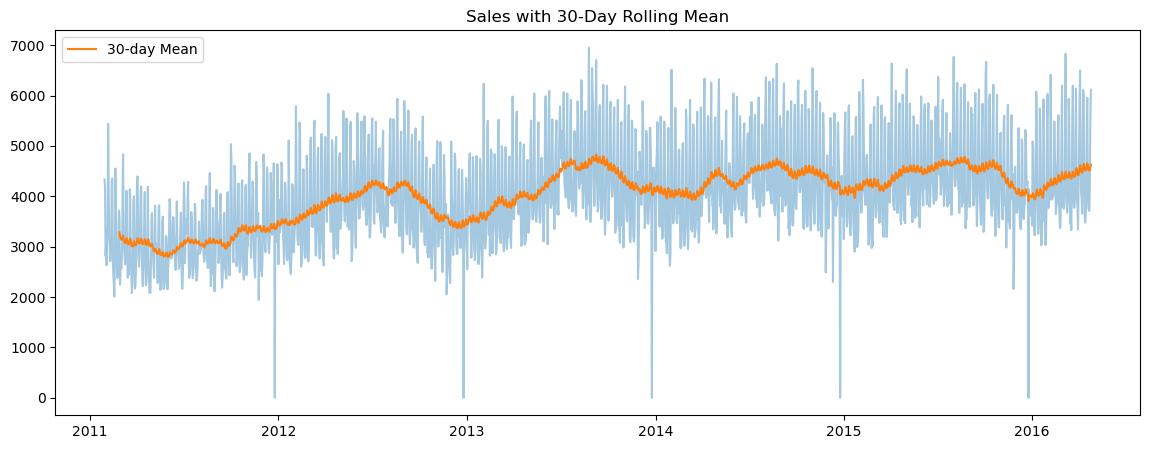

In [30]:
daily_store_sales["rolling_mean_30"] = (
    daily_store_sales["sales"].rolling(30).mean()
)
daily_store_sales["rolling_std_30"] = (
    daily_store_sales["sales"].rolling(30).std()
)

plt.figure(figsize=(14, 5))
plt.plot(daily_store_sales["date"], daily_store_sales["sales"], alpha=0.4)
plt.plot(daily_store_sales["date"], daily_store_sales["rolling_mean_30"], label="30-day Mean")
plt.legend()
plt.title("Sales with 30-Day Rolling Mean")
plt.show()

In [31]:
print("Missing values:")
print(daily_store_sales.isna().sum())

print("\nDays with zero sales:")
print((daily_store_sales["sales"] == 0).sum())

Missing values:
date                0
sales               0
day_of_week         0
rolling_mean_30    29
rolling_std_30     29
dtype: int64

Days with zero sales:
5


Baseline Forecasting

In [32]:
# Forecast horizon
HORIZON = 28  # 28 days (industry standard)

train = daily_store_sales.iloc[:-HORIZON]
test = daily_store_sales.iloc[-HORIZON:]

print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (1885, 5)
Test shape: (28, 5)


In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred)    
    return mae, rmse

1. Naive Forecast

In [34]:
last_value = train["sales"].iloc[-1]
naive_forecast = np.repeat(last_value, HORIZON)

naive_mae, naive_rmse = evaluate(
    test["sales"].values,
    naive_forecast
)

print("Naive Forecast MAE:", naive_mae)
print("Naive Forecast RMSE:", naive_rmse)

Naive Forecast MAE: 862.75
Naive Forecast RMSE: 934377.9642857143


2: Moving Average Forecast

In [35]:
window = 7
ma_value = train["sales"].iloc[-window:].mean()
ma_forecast = np.repeat(ma_value, HORIZON)

ma_mae, ma_rmse = evaluate(
    test["sales"].values,
    ma_forecast
)

print("Moving Average MAE:", ma_mae)
print("Moving Average RMSE:", ma_rmse)

Moving Average MAE: 825.6173469387753
Moving Average RMSE: 930033.4438775511


Plot Baselines

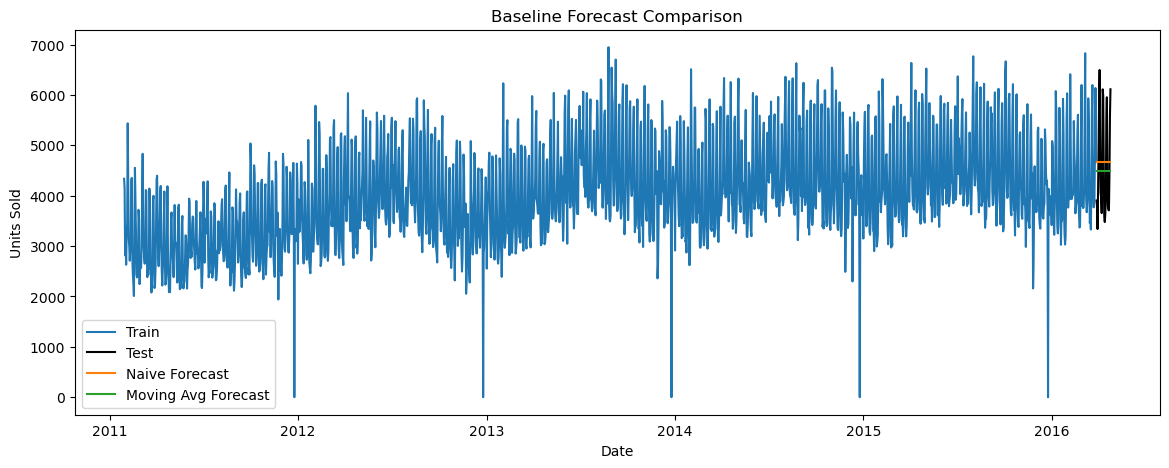

In [36]:
plt.figure(figsize=(14, 5))

plt.plot(train["date"], train["sales"], label="Train")
plt.plot(test["date"], test["sales"], label="Test", color="black")

plt.plot(test["date"], naive_forecast, label="Naive Forecast")
plt.plot(test["date"], ma_forecast, label="Moving Avg Forecast")

plt.title("Baseline Forecast Comparison")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.legend()
plt.show()


Results Table

In [37]:
baseline_results = pd.DataFrame({
    "Model": ["Naive", "Moving Average (7d)"],
    "MAE": [naive_mae, ma_mae],
    "RMSE": [naive_rmse, ma_rmse]
})

baseline_results

,Model,MAE,RMSE
0,Naive,862.750000,934377.964286
1,Moving Average (7d),825.617347,930033.443878


In [38]:
import numpy as np

def naive_forecast(last_value, horizon):
    return np.repeat(last_value, horizon)

def moving_average_forecast(series, window, horizon):
    avg = series.iloc[-window:].mean()
    return np.repeat(avg, horizon)


SARIMA Forecasting (Statistical Model)

In [39]:
series = (
    daily_store_sales
    .set_index("date")["sales"]
    .asfreq("D")
)

series.head()

date
2011-01-29    4337
2011-01-30    4155
2011-01-31    2816
2011-02-01    3051
2011-02-02    2630
Freq: D, Name: sales, dtype: int64

In [40]:
from statsmodels.tsa.stattools import adfuller

def adf_test(ts):
    result = adfuller(ts.dropna())
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])

adf_test(series)

ADF Statistic: -2.0354079792191144
p-value: 0.2712668960817074


In [41]:
series_diff = series.diff().dropna()

adf_test(series_diff)

ADF Statistic: -20.626011594184344
p-value: 0.0


From EDA, we saw weekly seasonality → m = 7

We’ll use:

d = 1 (trend differencing)

D = 1 (seasonal differencing)

m = 7

In [42]:
train_ts = series.iloc[:-HORIZON]
test_ts = series.iloc[-HORIZON:]

In [43]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model = SARIMAX(
    train_ts,
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 7),
    enforce_stationarity=False,
    enforce_invertibility=False
)

sarima_results = sarima_model.fit(disp=False)
sarima_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             sales   No. Observations:                 1885
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood              -13999.824
Date:                           Sun, 21 Dec 2025   AIC                          28009.648
Time:                                   12:25:59   BIC                          28037.312
Sample:                               01-29-2011   HQIC                         28019.841
                                    - 03-27-2016                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3501      0.015     24.096      0.000       0.322       0.379
ma.L1         -0.9603      0.008   -120.531      0.000      -0.976      -0.945
ar.S.L7        0.1062      0.022      4.887      0.000       0.064       0.149
ma.S.L7       -0.9709      0.007   -137.150      0.000      -0.985      -0.957
sigma2      1.874e+05   2234.397     83.892      0.000    1.83e+05    1.92e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):             18647.45
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               1.30   Skew:                            -1.62
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
sarima_forecast = sarima_results.forecast(steps=HORIZON)

In [45]:
sarima_mae, sarima_rmse = evaluate(
    test_ts.values,
    sarima_forecast.values
)

print("SARIMA MAE:", sarima_mae)
print("SARIMA RMSE:", sarima_rmse)

SARIMA MAE: 271.77744523423314
SARIMA RMSE: 128908.3221958391


In [46]:
comparison = pd.DataFrame({
    "Model": ["Naive", "Moving Avg (7d)", "SARIMA"],
    "MAE": [naive_mae, ma_mae, sarima_mae],
    "RMSE": [naive_rmse, ma_rmse, sarima_rmse]
})

comparison

,Model,MAE,RMSE
0,Naive,862.750000,934377.964286
1,Moving Avg (7d),825.617347,930033.443878
2,SARIMA,271.777445,128908.322196


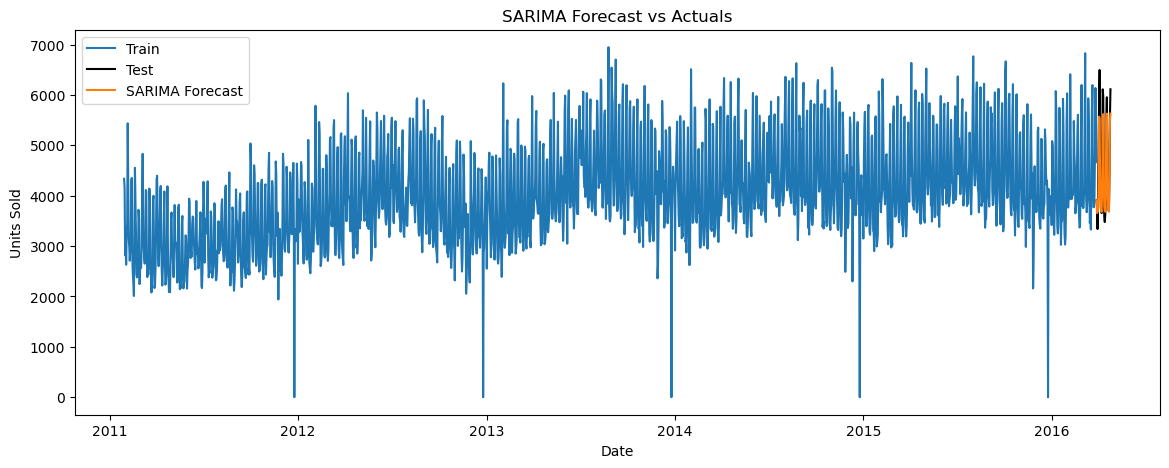

In [47]:
plt.figure(figsize=(14, 5))

plt.plot(train_ts.index, train_ts, label="Train")
plt.plot(test_ts.index, test_ts, label="Test", color="black")

plt.plot(test_ts.index, sarima_forecast, label="SARIMA Forecast")

plt.title("SARIMA Forecast vs Actuals")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.legend()
plt.show()


In [48]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

def train_sarima(series, order, seasonal_order):
    model = SARIMAX(
        series,
        order=order,
        seasonal_order=seasonal_order,
        enforce_stationarity=False,
        enforce_invertibility=False
    )
    return model.fit(disp=False)

XGBoost Forecasting

In [49]:
def create_features(df):
    df = df.copy()

    # Lag features
    for lag in [1, 7, 14]:
        df[f"lag_{lag}"] = df["sales"].shift(lag)

    # Rolling statistics
    for window in [7, 14, 30]:
        df[f"rolling_mean_{window}"] = (
            df["sales"].shift(1).rolling(window).mean()
        )

    # Calendar features
    df["day_of_week"] = df.index.dayofweek

    return df

In [50]:
ml_df = daily_store_sales.set_index("date")[["sales"]]
ml_df = create_features(ml_df)
ml_df = ml_df.dropna()

ml_df.head()

,sales,lag_1,lag_7,lag_14,rolling_mean_7,rolling_mean_14,rolling_mean_30,day_of_week
date,,,,,,,,
2011-02-28,2246,3548.0,3264.0,2757.0,2923.428571,2961.857143,3283.200000,0
2011-03-01,2549,2246.0,2441.0,2430.0,2778.000000,2925.357143,3213.500000,1
2011-03-02,2559,2549.0,2377.0,2272.0,2793.428571,2933.857143,3159.966667,2
2011-03-03,2568,2559.0,2414.0,2009.0,2819.428571,2954.357143,3151.400000,3
2011-03-04,2978,2568.0,2701.0,3015.0,2841.428571,2994.285714,3135.300000,4


In [51]:
X = ml_df.drop(columns=["sales"])
y = ml_df["sales"]

X_train = X.iloc[:-HORIZON]
X_test = X.iloc[-HORIZON:]

y_train = y.iloc[:-HORIZON]
y_test = y.iloc[-HORIZON:]

In [52]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [53]:
xgb_forecast = xgb_model.predict(X_test)

xgb_mae, xgb_rmse = evaluate(y_test.values, xgb_forecast)

print("XGBoost MAE:", xgb_mae)
print("XGBoost RMSE:", xgb_rmse)

XGBoost MAE: 225.59493582589286
XGBoost RMSE: 85787.40112303836


In [54]:
comparison = pd.DataFrame({
    "Model": ["Naive", "Moving Avg", "SARIMA", "XGBoost"],
    "MAE": [naive_mae, ma_mae, sarima_mae, xgb_mae],
    "RMSE": [naive_rmse, ma_rmse, sarima_rmse, xgb_rmse]
})

comparison

,Model,MAE,RMSE
0,Naive,862.750000,934377.964286
1,Moving Avg,825.617347,930033.443878
2,SARIMA,271.777445,128908.322196
3,XGBoost,225.594936,85787.401123


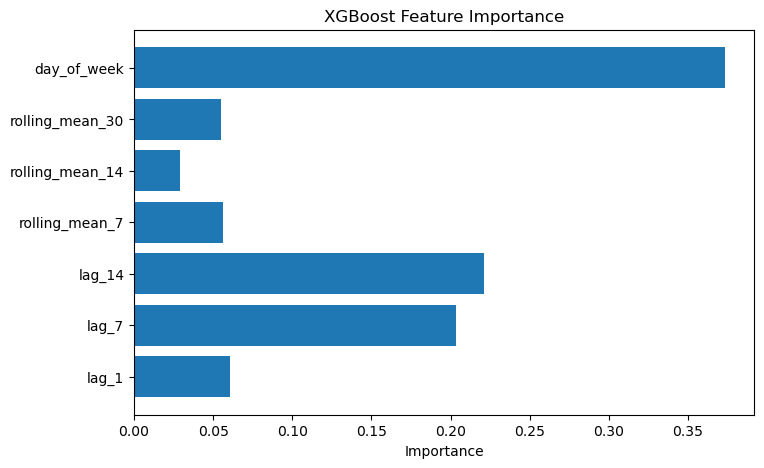

In [56]:
import matplotlib.pyplot as plt

importance = xgb_model.feature_importances_
features = X_train.columns

plt.figure(figsize=(8, 5))
plt.barh(features, importance)
plt.title("XGBoost Feature Importance")
plt.xlabel("Importance")
plt.show()

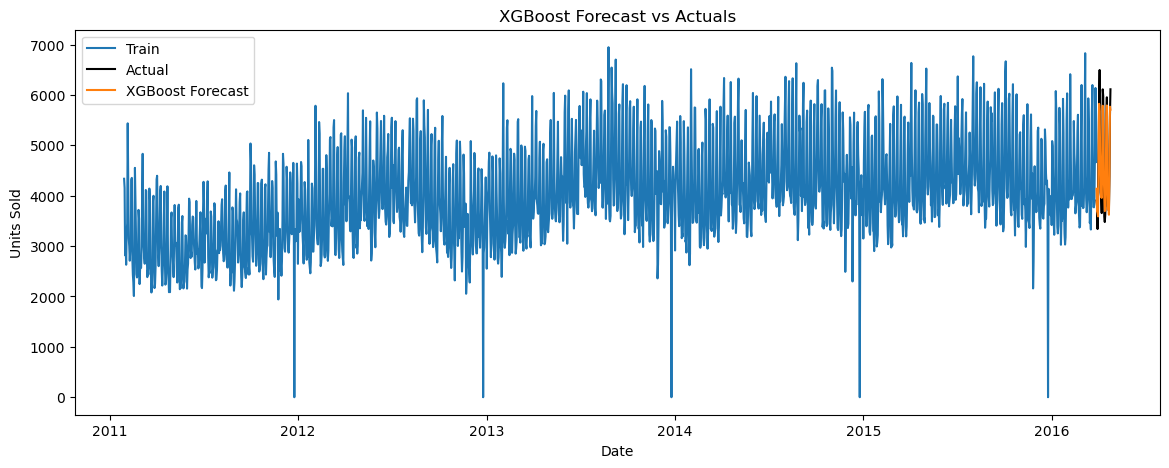

In [57]:
plt.figure(figsize=(14, 5))

plt.plot(train_ts.index, train_ts, label="Train")
plt.plot(test_ts.index, test_ts, label="Actual", color="black")
plt.plot(test_ts.index, xgb_forecast, label="XGBoost Forecast")

plt.title("XGBoost Forecast vs Actuals")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.legend()
plt.show()

In [58]:
from xgboost import XGBRegressor

def train_xgboost(X_train, y_train):
    model = XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )
    model.fit(X_train, y_train)
    return model

LSTM Forecasting (Deep Learning – PyTorch)

In [59]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

sales_values = daily_store_sales[["sales"]].values
scaled_sales = scaler.fit_transform(sales_values)

In [60]:
def create_sequences(data, lookback=30):
    X, y = [], []
    for i in range(len(data) - lookback):
        X.append(data[i:i+lookback])
        y.append(data[i+lookback])
    return np.array(X), np.array(y)

LOOKBACK = 30

X_seq, y_seq = create_sequences(scaled_sales, LOOKBACK)

print(X_seq.shape, y_seq.shape)

(1883, 30, 1) (1883, 1)


In [61]:
X_train = X_seq[:-HORIZON]
X_test = X_seq[-HORIZON:]

y_train = y_seq[:-HORIZON]
y_test = y_seq[-HORIZON:]

In [62]:
import torch
from torch.utils.data import TensorDataset, DataLoader

X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32)

X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.float32)

train_ds = TensorDataset(X_train_t, y_train_t)
train_dl = DataLoader(train_ds, batch_size=32, shuffle=True)

In [63]:
import torch.nn as nn

class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=64):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]
        return self.fc(out)

In [81]:
from tqdm import tqdm
import matplotlib.pyplot as plt

model = LSTMModel()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

EPOCHS = 1500
epoch_losses = []  # to store loss for plotting

progress_bar = tqdm(range(EPOCHS), desc="Training LSTM", ncols=100)

for epoch in progress_bar:
    model.train()
    epoch_loss = 0.0

    for xb, yb in train_dl:
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    epoch_losses.append(epoch_loss)

    # Update tqdm status bar
    progress_bar.set_postfix(loss=f"{epoch_loss:.4f}")


Training LSTM:   0%|                                                       | 0/1500 [00:00<?, ?it/s]

Training LSTM: 100%|███████████████████████████████| 1500/1500 [12:33<00:00,  1.99it/s, loss=0.0004]


Plot loss curve to show saturation

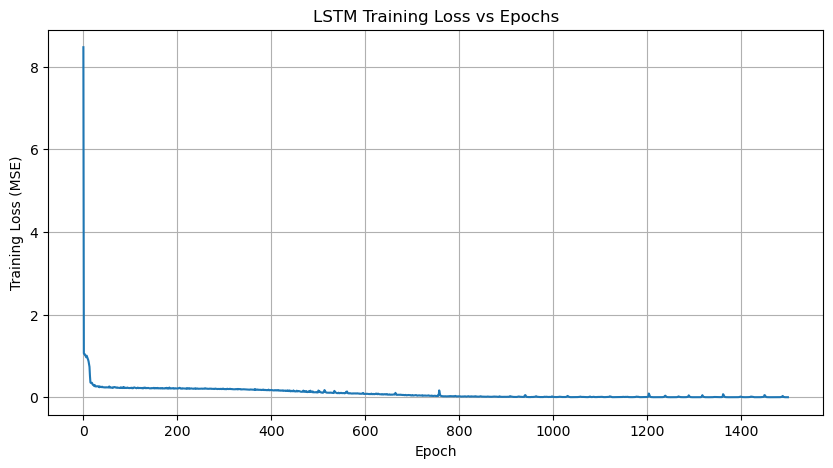

In [82]:
plt.figure(figsize=(10, 5))
plt.plot(epoch_losses)
plt.xlabel("Epoch")
plt.ylabel("Training Loss (MSE)")
plt.title("LSTM Training Loss vs Epochs")
plt.grid(True)
plt.show()

Log-scale plot for saturation clarity

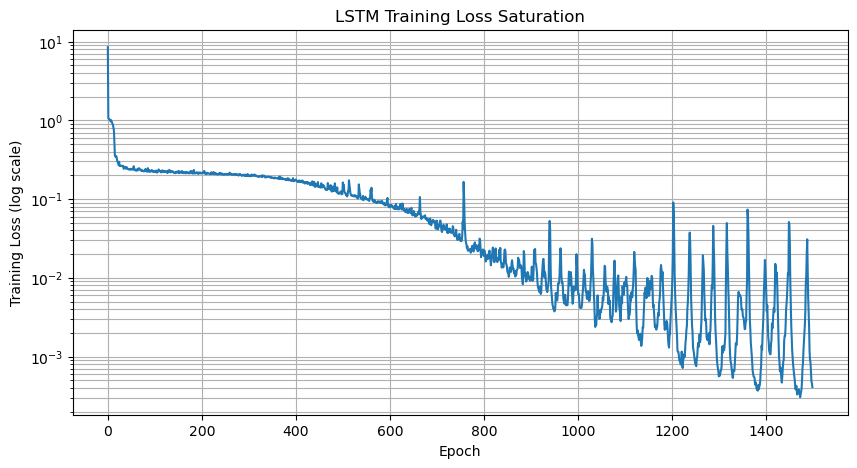

In [88]:
plt.figure(figsize=(10, 5))
plt.plot(epoch_losses)
plt.yscale("log")
plt.xlabel("Epoch")
plt.ylabel("Training Loss (log scale)")
plt.title("LSTM Training Loss Saturation")
plt.grid(True, which="both")
plt.show()

In [83]:
model.eval()
with torch.no_grad():
    lstm_preds = model(X_test_t).numpy()

# Inverse scaling
lstm_preds = scaler.inverse_transform(lstm_preds)
y_test_inv = scaler.inverse_transform(y_test)

In [84]:
lstm_mae, lstm_rmse = evaluate(
    y_test_inv.flatten(),
    lstm_preds.flatten()
)

print("LSTM MAE:", lstm_mae)
print("LSTM RMSE:", lstm_rmse)

LSTM MAE: 354.82674734933033
LSTM RMSE: 214673.33842021227


In [85]:
final_results = pd.DataFrame({
    "Model": ["Naive", "Moving Avg", "SARIMA", "XGBoost", "LSTM"],
    "MAE": [naive_mae, ma_mae, sarima_mae, xgb_mae, lstm_mae],
    "RMSE": [naive_rmse, ma_rmse, sarima_rmse, xgb_rmse, lstm_rmse]
})

final_results

,Model,MAE,RMSE
0,Naive,862.750000,934377.964286
1,Moving Avg,825.617347,930033.443878
2,SARIMA,271.777445,128908.322196
3,XGBoost,225.594936,85787.401123
4,LSTM,354.826747,214673.338420


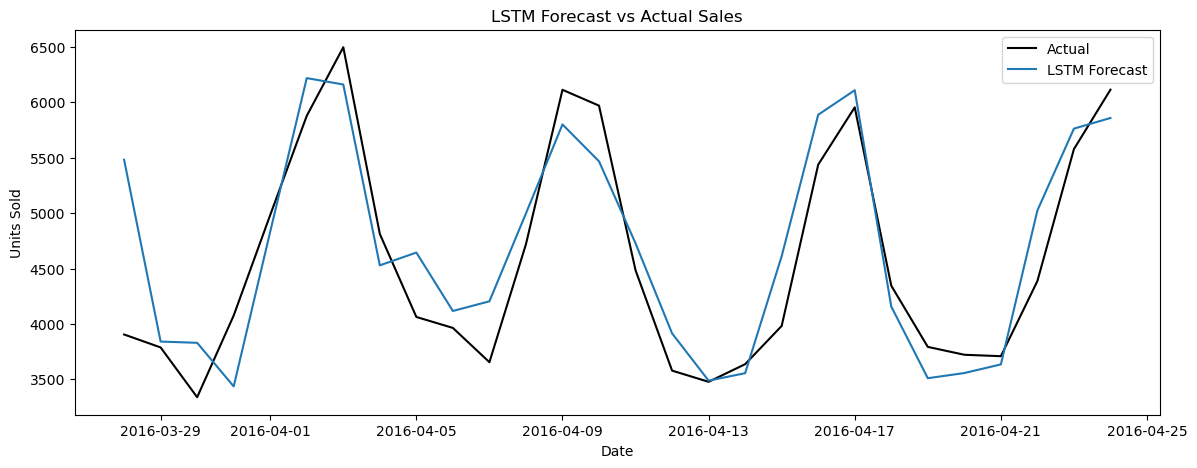

In [86]:
plt.figure(figsize=(14, 5))

plt.plot(test_ts.index, test_ts.values, label="Actual", color="black")
plt.plot(test_ts.index, lstm_preds.flatten(), label="LSTM Forecast")

plt.title("LSTM Forecast vs Actual Sales")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.legend()
plt.show()

In [87]:
import torch
import torch.nn as nn

class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=64):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]
        return self.fc(out)

HIERARCHICAL TIME-SERIES FORECASTING

In [89]:
# Sanity check to ensure sales_long exists
sales_long.head()

,id,item_id,dept_id,cat_id,store_id,state_id,day,sales,date
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29


In [90]:
# Define hierarchy levels explicitly
HIERARCHY_LEVELS = [
    "state_id",
    "store_id",
    "cat_id",
    "dept_id",
    "item_id"
]

print("Hierarchy levels:", HIERARCHY_LEVELS)

Hierarchy levels: ['state_id', 'store_id', 'cat_id', 'dept_id', 'item_id']


In [91]:
def aggregate_sales(df, group_cols):
    """
    Aggregates sales at a given hierarchy level.

    Parameters
    ----------
    df : pandas.DataFrame
        Long-format sales data with a 'date' and 'sales' column
    group_cols : list
        Columns representing the hierarchy level

    Returns
    -------
    pandas.DataFrame
        Aggregated daily sales at the specified hierarchy level
    """
    return (
        df
        .groupby(group_cols + ["date"], as_index=False)["sales"]
        .sum()
        .sort_values("date")
    )


In [92]:
# Aggregate sales at different hierarchy levels

state_level = aggregate_sales(sales_long, ["state_id"])

store_level = aggregate_sales(
    sales_long,
    ["state_id", "store_id"]
)

category_level = aggregate_sales(
    sales_long,
    ["state_id", "store_id", "cat_id"]
)

product_level = aggregate_sales(
    sales_long,
    ["state_id", "store_id", "cat_id", "dept_id", "item_id"]
)

print("State level shape:", state_level.shape)
print("Store level shape:", store_level.shape)
print("Category level shape:", category_level.shape)
print("Product level shape:", product_level.shape)

State level shape: (5739, 3)
Store level shape: (19130, 4)
Category level shape: (57390, 5)
Product level shape: (58327370, 7)


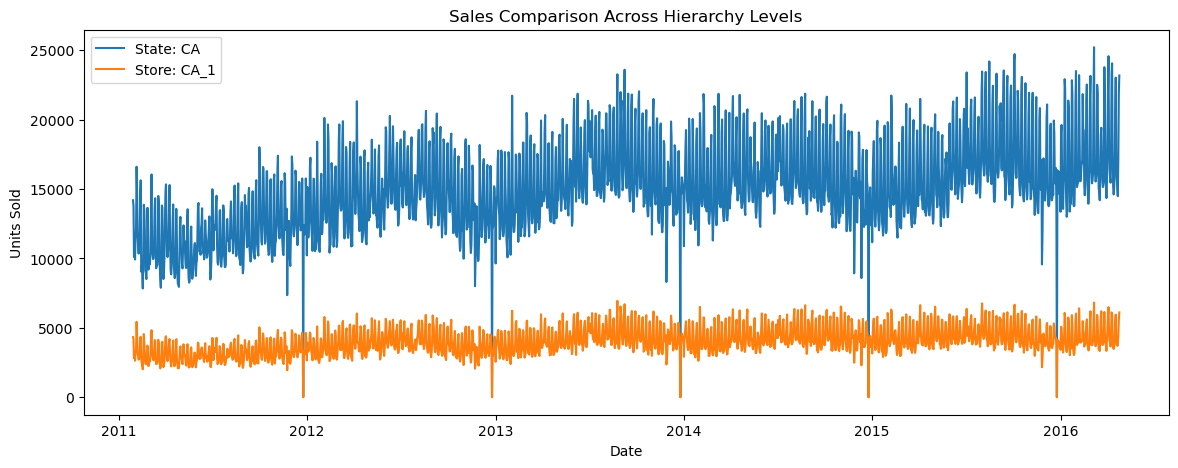

In [93]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))

# Select a sample hierarchy for visualization
sample_state = state_level[state_level["state_id"] == "CA"]
sample_store = store_level[store_level["store_id"] == "CA_1"]

plt.plot(sample_state["date"], sample_state["sales"], label="State: CA")
plt.plot(sample_store["date"], sample_store["sales"], label="Store: CA_1")

plt.title("Sales Comparison Across Hierarchy Levels")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.legend()
plt.show()

ADD EXOGENOUS VARIABLES

In [94]:
# Load price data
prices = pd.read_csv("sell_prices.csv")

prices.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [95]:
# Copy calendar to avoid mutation
calendar_features = calendar.copy()

# Binary indicator for any event/holiday
calendar_features["is_event"] = calendar_features["event_name_1"].notna().astype(int)

# One-hot encode event types
event_dummies = pd.get_dummies(
    calendar_features["event_type_1"],
    prefix="event",
    dummy_na=True
)

calendar_features = pd.concat(
    [calendar_features, event_dummies],
    axis=1
)

calendar_features.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,is_event,event_Cultural,event_National,event_Religious,event_Sporting,event_nan
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,1
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,1
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,1
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0,0,0,0,0,0,1
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1,0,0,0,0,0,1


In [96]:
# Temporal features
calendar_features["date"] = pd.to_datetime(calendar_features["date"])

calendar_features["day"] = calendar_features["date"].dt.day
calendar_features["week"] = calendar_features["date"].dt.isocalendar().week.astype(int)
calendar_features["month"] = calendar_features["date"].dt.month
calendar_features["year"] = calendar_features["date"].dt.year
calendar_features["is_weekend"] = calendar_features["wday"].isin([1, 7]).astype(int)

calendar_features[
    ["date", "day", "week", "month", "year", "is_weekend"]
].head()

,date,day,week,month,year,is_weekend
0,2011-01-29,29,4,1,2011,1
1,2011-01-30,30,4,1,2011,0
2,2011-01-31,31,5,1,2011,0
3,2011-02-01,1,5,2,2011,0
4,2011-02-02,2,5,2,2011,0


In [ ]:
# State-specific SNAP benefits
def assign_snap(row):
    if row["state_id"] == "CA":
        return row["snap_CA"]
    elif row["state_id"] == "TX":
        return row["snap_TX"]
    else:
        return row["snap_WI"]

sales_exog["snap"] = sales_exog.apply(assign_snap, axis=1)

sales_exog[["state_id", "snap"]].drop_duplicates().head()

In [ ]:
# Merge price data
sales_exog = sales_exog.merge(
    prices,
    on=["store_id", "item_id", "wm_yr_wk"],
    how="left"
)

sales_exog.head()

In [ ]:
# Price-based features
sales_exog["price_change"] = (
    sales_exog
    .groupby(["store_id", "item_id"])["sell_price"]
    .pct_change()
)

sales_exog["price_change"].fillna(0, inplace=True)

sales_exog[["sell_price", "price_change"]].head()

### Final Feature Categories

- **Autoregressive**: past sales (to be added during modeling)
- **Calendar-based**: day, week, month, year, weekend
- **Events**: holidays, cultural events
- **Economic**: SNAP benefits
- **Price-based**: sell price, price changes

These features enable traditional, ML-based, and deep learning models.

In [ ]:
# Save enriched dataset for modeling
Path("../data/processed").mkdir(exist_ok=True)

sales_exog.to_csv(
    "../data/processed/sales_with_exogenous_features.csv",
    index=False
)

# Advanced Feature Engineering (Autoregressive Only)

This section creates autoregressive and seasonal features directly from historical sales.
External variables will be merged later during model training to maintain modularity.


In [103]:
# ================================
# STEP 3.1 — DATA SUBSAMPLING
# ================================

# Select realistic but manageable subset
SELECTED_STATES = ["CA"]
SELECTED_STORES = ["CA_1", "CA_2"]

np.random.seed(42)

sample_items = (
    sales_long["item_id"]
    .drop_duplicates()
    .sample(n=100, random_state=42)
)

sales_subset = sales_long[
    (sales_long["state_id"].isin(SELECTED_STATES)) &
    (sales_long["store_id"].isin(SELECTED_STORES)) &
    (sales_long["item_id"].isin(sample_items))
].copy()

print("Subset shape:", sales_subset.shape)


Subset shape: (382600, 9)


In [104]:
# ================================
# STEP 3.2 — SORTING
# ================================

sales_subset = sales_subset.sort_values(
    ["state_id", "store_id", "item_id", "date"]
).reset_index(drop=True)

In [105]:
ROLLING_WINDOWS = [7, 14, 28]

for window in ROLLING_WINDOWS:
    sales_long[f"rolling_mean_{window}"] = (
        sales_long
        .groupby(["state_id", "store_id", "item_id"])["sales"]
        .shift(1)
        .rolling(window)
        .mean()
    )

    sales_long[f"rolling_std_{window}"] = (
        sales_long
        .groupby(["state_id", "store_id", "item_id"])["sales"]
        .shift(1)
        .rolling(window)
        .std()
    )


In [106]:
sales_long["expanding_mean"] = (
    sales_long
    .groupby(["state_id", "store_id", "item_id"])["sales"]
    .shift(1)
    .expanding()
    .mean()
)


In [107]:
from sklearn.preprocessing import LabelEncoder

HIERARCHY_COLS = ["state_id", "store_id", "cat_id", "dept_id", "item_id"]

for col in HIERARCHY_COLS:
    le = LabelEncoder()
    sales_long[col + "_enc"] = le.fit_transform(sales_long[col])


In [108]:
# ================================
# STEP 3.3 — MEMORY OPTIMIZATION
# ================================

def reduce_mem_usage(df):
    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object and col_type.name != "datetime64[ns]":
            c_min = df[col].min()
            c_max = df[col].max()

            if str(col_type).startswith("int"):
                if c_min >= 0:
                    if c_max < 255:
                        df[col] = df[col].astype("uint8")
                    elif c_max < 65535:
                        df[col] = df[col].astype("uint16")
                    else:
                        df[col] = df[col].astype("uint32")
                else:
                    if c_min > -128 and c_max < 127:
                        df[col] = df[col].astype("int8")
                    elif c_min > -32768 and c_max < 32767:
                        df[col] = df[col].astype("int16")
                    else:
                        df[col] = df[col].astype("int32")

            elif str(col_type).startswith("float"):
                df[col] = df[col].astype("float32")

    return df

sales_subset = reduce_mem_usage(sales_subset)


In [109]:
# ================================
# STEP 3.4 — FEATURE FUNCTIONS
# ================================

def create_lag_features(df, lags):
    for lag in lags:
        df[f"lag_{lag}"] = df["sales"].shift(lag)
    return df

def create_rolling_features(df, windows):
    for w in windows:
        df[f"rolling_mean_{w}"] = df["sales"].shift(1).rolling(w).mean()
        df[f"rolling_std_{w}"] = df["sales"].shift(1).rolling(w).std()
    return df

In [110]:
# ================================
# STEP 3.5 — APPLY FEATURE ENGINEERING
# ================================

LAG_DAYS = [1, 7, 14, 28]
ROLLING_WINDOWS = [7, 14, 28]

sales_features = (
    sales_subset
    .groupby(["state_id", "store_id", "item_id"], group_keys=False)
    .apply(lambda x: create_rolling_features(
        create_lag_features(x, LAG_DAYS),
        ROLLING_WINDOWS
    ))
    .reset_index(drop=True)
)

print("After feature creation:", sales_features.shape)

After feature creation: (382600, 19)


In [111]:
# ================================
# STEP 3.6 — EXPANDING MEAN
# ================================

sales_features["expanding_mean"] = (
    sales_features
    .groupby(["state_id", "store_id", "item_id"])["sales"]
    .shift(1)
    .expanding()
    .mean()
)

In [112]:
# ================================
# STEP 3.7 — FOURIER FEATURES
# ================================

def add_fourier_features(df, period, order):
    t = np.arange(len(df))
    for i in range(1, order + 1):
        df[f"sin_{period}_{i}"] = np.sin(2 * np.pi * i * t / period)
        df[f"cos_{period}_{i}"] = np.cos(2 * np.pi * i * t / period)
    return df

sales_features = add_fourier_features(sales_features, period=7, order=3)
sales_features = add_fourier_features(sales_features, period=365, order=2)

In [113]:
# ================================
# STEP 3.8 — HIERARCHY ENCODING
# ================================

from sklearn.preprocessing import LabelEncoder

HIERARCHY_COLS = ["state_id", "store_id", "cat_id", "dept_id", "item_id"]

for col in HIERARCHY_COLS:
    le = LabelEncoder()
    sales_features[col + "_enc"] = le.fit_transform(sales_features[col])


In [114]:
# ================================
# STEP 3.9 — CLEAN FINAL DATA
# ================================

print("Before dropna:", sales_features.shape)

sales_features = sales_features.dropna().reset_index(drop=True)

print("After dropna:", sales_features.shape)


Before dropna: (382600, 35)
After dropna: (377000, 35)


In [117]:
# ================================
# STEP 3.10 — SAVE FEATURES
# ================================

sales_features.to_csv("sales_autoregressive_features.csv",index=False)


# Time-Series Cross-Validation

This section implements rolling-window time-series cross-validation to evaluate
forecasting models under realistic conditions and prevent data leakage.

Unlike random train-test splits, time-series validation respects temporal order.


In [119]:
import pandas as pd
import numpy as np

sales_features = pd.read_csv(
    "sales_autoregressive_features.csv",
    parse_dates=["date"]
)

sales_features.head()


,id,item_id,dept_id,cat_id,store_id,state_id,day,sales,date,lag_1,...,cos_7_3,sin_365_1,cos_365_1,sin_365_2,cos_365_2,state_id_enc,store_id_enc,cat_id_enc,dept_id_enc,item_id_enc
0,FOODS_1_052_CA_1_validation,FOODS_1_052,FOODS_1,FOODS,CA_1,CA,d_29,0,2011-02-26,0.0,...,1.000000,0.463550,0.886071,0.821477,0.570242,0,0,0,0,0
1,FOODS_1_052_CA_1_validation,FOODS_1_052,FOODS_1,FOODS,CA_1,CA,d_30,0,2011-02-27,0.0,...,-0.900969,0.478734,0.877960,0.840618,0.541628,0,0,0,0,0
2,FOODS_1_052_CA_1_validation,FOODS_1_052,FOODS_1,FOODS,CA_1,CA,d_31,0,2011-02-28,0.0,...,0.623490,0.493776,0.869589,0.858764,0.512371,0,0,0,0,0
3,FOODS_1_052_CA_1_validation,FOODS_1_052,FOODS_1,FOODS,CA_1,CA,d_32,0,2011-03-01,0.0,...,-0.222521,0.508671,0.860961,0.875892,0.482508,0,0,0,0,0
4,FOODS_1_052_CA_1_validation,FOODS_1_052,FOODS_1,FOODS,CA_1,CA,d_33,0,2011-03-02,0.0,...,-0.222521,0.523416,0.852078,0.891981,0.452072,0,0,0,0,0


In [120]:
# ================================
# FORECAST CONFIGURATION
# ================================

FORECAST_HORIZON = 28     # days to predict
TRAIN_WINDOW = 365 * 2   # 2 years of training data
STEP_SIZE = 28           # move window by 28 days


In [121]:
# ================================
# TIME-SERIES SPLIT FUNCTION
# ================================

def time_series_cv_splits(
    df,
    date_col,
    train_window,
    horizon,
    step_size
):
    """
    Generate rolling time-series train/validation splits.

    Returns list of (train_df, val_df)
    """
    splits = []
    unique_dates = np.sort(df[date_col].unique())

    start = 0
    while True:
        train_start = start
        train_end = train_start + train_window
        val_end = train_end + horizon

        if val_end > len(unique_dates):
            break

        train_dates = unique_dates[train_start:train_end]
        val_dates = unique_dates[train_end:val_end]

        train_df = df[df[date_col].isin(train_dates)]
        val_df = df[df[date_col].isin(val_dates)]

        splits.append((train_df, val_df))
        start += step_size

    return splits


In [122]:
cv_splits = time_series_cv_splits(
    df=sales_features,
    date_col="date",
    train_window=TRAIN_WINDOW,
    horizon=FORECAST_HORIZON,
    step_size=STEP_SIZE
)

print(f"Number of CV splits: {len(cv_splits)}")


Number of CV splits: 41


In [123]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def smape(y_true, y_pred):
    return np.mean(
        2 * np.abs(y_pred - y_true) /
        (np.abs(y_true) + np.abs(y_pred) + 1e-8)
    ) * 100


In [124]:
# ================================
# BASELINE FORECAST FUNCTION
# ================================

def naive_forecast(train_df, val_df):
    """
    Uses lag_28 as forecast
    """
    preds = val_df["lag_28"].values
    actuals = val_df["sales"].values

    return actuals, preds


In [125]:
# ================================
# RUN CV EVALUATION
# ================================

cv_results = []

for i, (train_df, val_df) in enumerate(cv_splits, start=1):

    y_true, y_pred = naive_forecast(train_df, val_df)

    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    smape_val = smape(y_true, y_pred)

    cv_results.append({
        "fold": i,
        "MAE": mae,
        "RMSE": rmse,
        "sMAPE": smape_val
    })

cv_results_df = pd.DataFrame(cv_results)
cv_results_df


,fold,MAE,RMSE,sMAPE
0,1,0.898929,2.197726,55.594133
1,2,0.913750,2.368355,54.175407
2,3,0.891429,2.239818,54.585206
3,4,1.006250,2.424687,59.298911
4,5,1.003036,2.422698,60.551264
5,6,1.017500,2.365753,61.637401
6,7,0.959107,2.119762,59.263469
7,8,0.979643,2.103399,62.104492
8,9,1.004464,2.210971,65.537833
9,10,1.020714,2.257369,65.633669


### Cross-Validation Results (Naïve Baseline)

- Rolling-window evaluation with 28-day horizon
- Metrics: MAE, RMSE, sMAPE
- Serves as benchmark for advanced ML & DL models

Any model must outperform this baseline to be considered useful.


In [127]:
cv_results_df.to_csv(
    "ts_cv_baseline_results.csv",
    index=False
)

# XGBoost Forecasting with Time-Series Cross-Validation

This section trains a gradient-boosted tree model (XGBoost) for demand forecasting
using autoregressive features and evaluates it using rolling-window
time-series cross-validation.


In [128]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

In [129]:
sales_features = pd.read_csv(
    "sales_autoregressive_features.csv",
    parse_dates=["date"]
)

sales_features.head()


,id,item_id,dept_id,cat_id,store_id,state_id,day,sales,date,lag_1,...,cos_7_3,sin_365_1,cos_365_1,sin_365_2,cos_365_2,state_id_enc,store_id_enc,cat_id_enc,dept_id_enc,item_id_enc
0,FOODS_1_052_CA_1_validation,FOODS_1_052,FOODS_1,FOODS,CA_1,CA,d_29,0,2011-02-26,0.0,...,1.000000,0.463550,0.886071,0.821477,0.570242,0,0,0,0,0
1,FOODS_1_052_CA_1_validation,FOODS_1_052,FOODS_1,FOODS,CA_1,CA,d_30,0,2011-02-27,0.0,...,-0.900969,0.478734,0.877960,0.840618,0.541628,0,0,0,0,0
2,FOODS_1_052_CA_1_validation,FOODS_1_052,FOODS_1,FOODS,CA_1,CA,d_31,0,2011-02-28,0.0,...,0.623490,0.493776,0.869589,0.858764,0.512371,0,0,0,0,0
3,FOODS_1_052_CA_1_validation,FOODS_1_052,FOODS_1,FOODS,CA_1,CA,d_32,0,2011-03-01,0.0,...,-0.222521,0.508671,0.860961,0.875892,0.482508,0,0,0,0,0
4,FOODS_1_052_CA_1_validation,FOODS_1_052,FOODS_1,FOODS,CA_1,CA,d_33,0,2011-03-02,0.0,...,-0.222521,0.523416,0.852078,0.891981,0.452072,0,0,0,0,0


In [130]:
# ================================
# FEATURE SELECTION
# ================================

TARGET = "sales"

DROP_COLS = [
    "sales",
    "date",
    "state_id",
    "store_id",
    "cat_id",
    "dept_id",
    "item_id"
]

FEATURE_COLS = [c for c in sales_features.columns if c not in DROP_COLS]

print("Number of features:", len(FEATURE_COLS))


Number of features: 28


In [131]:
# Reuse CV split function
def time_series_cv_splits(
    df,
    date_col,
    train_window,
    horizon,
    step_size
):
    splits = []
    unique_dates = np.sort(df[date_col].unique())
    start = 0

    while True:
        train_end = start + train_window
        val_end = train_end + horizon

        if val_end > len(unique_dates):
            break

        train_dates = unique_dates[start:train_end]
        val_dates = unique_dates[train_end:val_end]

        train_df = df[df[date_col].isin(train_dates)]
        val_df = df[df[date_col].isin(val_dates)]

        splits.append((train_df, val_df))
        start += step_size

    return splits

In [132]:
FORECAST_HORIZON = 28
TRAIN_WINDOW = 365 * 2
STEP_SIZE = 28

cv_splits = time_series_cv_splits(
    sales_features,
    "date",
    TRAIN_WINDOW,
    FORECAST_HORIZON,
    STEP_SIZE
)

print("CV folds:", len(cv_splits))

CV folds: 41


In [135]:
xgb_model = XGBRegressor(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)

train_df[FEATURE_COLS].dtypes.value_counts()

float64    21
int64       5
object      2
dtype: int64

In [137]:
# ================================
# FEATURE SELECTION (FIXED)
# ================================

TARGET = "sales"

DROP_COLS = [
    "sales",
    "date",

    # raw identifiers (non-numeric)
    "id",
    "day",

    # hierarchy identifiers (kept via encoded versions)
    "state_id",
    "store_id",
    "cat_id",
    "dept_id",
    "item_id"
]

FEATURE_COLS = [
    c for c in sales_features.columns
    if c not in DROP_COLS
]

# Sanity check
sales_features[FEATURE_COLS].dtypes.value_counts()


float64    21
int64       5
dtype: int64

In [138]:
assert sales_features[FEATURE_COLS].select_dtypes(include="object").empty

In [139]:
# ================================
# XGBOOST CROSS-VALIDATION
# ================================

xgb_results = []

for fold, (train_df, val_df) in enumerate(cv_splits, start=1):

    X_train = train_df[FEATURE_COLS]
    y_train = train_df[TARGET]

    X_val = val_df[FEATURE_COLS]
    y_val = val_df[TARGET]

    xgb_model.fit(X_train, y_train)

    preds = xgb_model.predict(X_val)

    mae = mean_absolute_error(y_val, preds)
    rmse = np.sqrt(mean_squared_error(y_val, preds))

    xgb_results.append({
        "fold": fold,
        "MAE": mae,
        "RMSE": rmse
    })

xgb_results_df = pd.DataFrame(xgb_results)
xgb_results_df


,fold,MAE,RMSE
0,1,0.732959,1.738474
1,2,0.678546,1.520002
2,3,0.711578,1.635675
3,4,0.792736,1.772243
4,5,0.797993,1.845469
5,6,0.766021,1.534688
6,7,0.786583,1.615842
7,8,0.801887,1.528076
8,9,0.805778,1.665774
9,10,0.815444,1.607046


# Multi-Step LSTM

In [142]:
# ================================
# ENSURE WEEKEND FEATURE EXISTS
# ================================

if "is_weekend" not in sales_features.columns:
    sales_features["is_weekend"] = (
        sales_features["date"].dt.weekday >= 5
    ).astype(int)

sales_features[["date", "is_weekend"]].head()


,date,is_weekend
0,2011-02-26,1
1,2011-02-27,1
2,2011-02-28,0
3,2011-03-01,0
4,2011-03-02,0


In [143]:
# ================================
# STORE-LEVEL DATA FOR LSTM
# ================================

lstm_df = (
    sales_features
    .groupby(["date", "store_id"], as_index=False)
    .agg({
        "sales": "sum",
        "is_weekend": "max"
    })
)

STORE_ID = lstm_df["store_id"].iloc[0]

store_lstm = (
    lstm_df[lstm_df["store_id"] == STORE_ID]
    .sort_values("date")
    .reset_index(drop=True)
)

store_lstm.head()


,date,store_id,sales,is_weekend
0,2011-02-26,CA_1,75,1
1,2011-02-27,CA_1,95,1
2,2011-02-28,CA_1,46,0
3,2011-03-01,CA_1,64,0
4,2011-03-02,CA_1,65,0


In [144]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_values = scaler.fit_transform(
    store_lstm[["sales", "is_weekend"]]
)

scaled_df = pd.DataFrame(
    scaled_values,
    columns=["sales_scaled", "is_weekend_scaled"]
)

scaled_df.head()


,sales_scaled,is_weekend_scaled
0,0.326087,1.0
1,0.413043,1.0
2,0.200000,0.0
3,0.278261,0.0
4,0.282609,0.0


In [145]:
# ================================
# SEQUENCE GENERATOR
# ================================

def create_sequences(data, input_window, forecast_horizon):
    X, y = [], []

    for i in range(len(data) - input_window - forecast_horizon):
        X.append(data[i : i + input_window])
        y.append(
            data[
                i + input_window : i + input_window + forecast_horizon, 0
            ]  # sales only
        )

    return np.array(X), np.array(y)


INPUT_WINDOW = 30
FORECAST_HORIZON = 28

X, y = create_sequences(
    scaled_df.values,
    INPUT_WINDOW,
    FORECAST_HORIZON
)

X.shape, y.shape


((1827, 30, 2), (1827, 28))

In [146]:
split_idx = int(len(X) * 0.8)

X_train, X_val = X[:split_idx], X[split_idx:]
y_train, y_val = y[:split_idx], y[split_idx:]


In [147]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

tf.random.set_seed(42)

model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(INPUT_WINDOW, X.shape[2])),
    Dropout(0.2),

    LSTM(32),
    Dropout(0.2),

    Dense(FORECAST_HORIZON)
])

model.compile(
    optimizer="adam",
    loss="mse"
)

model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            17152     
                                                                 
 dropout (Dropout)           (None, 30, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 28)                924       
                                                                 
Total params: 30492 (119.11 KB)
Trainable params: 30492 (119.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [148]:
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,
    verbose=1
)

Epoch 1/20

46/46 [==============================] - 15s 134ms/step - loss: 0.0881 - val_loss: 0.0257
Epoch 2/20
46/46 [==============================] - 2s 45ms/step - loss: 0.0311 - val_loss: 0.0193
Epoch 3/20
46/46 [==============================] - 2s 38ms/step - loss: 0.0264 - val_loss: 0.0188
Epoch 4/20
46/46 [==============================] - 2s 36ms/step - loss: 0.0245 - val_loss: 0.0189
Epoch 5/20
46/46 [==============================] - 2s 38ms/step - loss: 0.0230 - val_loss: 0.0181
Epoch 6/20
46/46 [==============================] - 2s 37ms/step - loss: 0.0221 - val_loss: 0.0177
Epoch 7/20
46/46 [==============================] - 2s 35ms/step - loss: 0.0214 - val_loss: 0.0190
Epoch 8/20
46/46 [==============================] - 2s 34ms/step - loss: 0.0201 - val_loss: 0.0181
Epoch 9/20
46/46 [==============================] - 2s 37ms/step - loss: 0.0198 - val_loss: 0.0172
Epoch 10/20
46/46 [==============================] - 2s 35ms/step - loss: 0.0191 - val_loss: 0.0170
Epoch 

In [149]:
# Last available window
last_window = X_val[-1].reshape(1, INPUT_WINDOW, X.shape[2])

scaled_forecast = model.predict(last_window)[0]

1/1 [==============================] - 2s 2s/step


In [150]:
# Create dummy array for inverse scaling
dummy = np.zeros((FORECAST_HORIZON, 2))
dummy[:, 0] = scaled_forecast

forecast_sales = scaler.inverse_transform(dummy)[:, 0]

forecast_sales


array([158.71347547, 135.91944873, 110.90563595,  99.20308858,
       106.88360095, 131.90411747, 152.20509529, 158.22189569,
       134.4056797 , 110.21986723, 104.06381011, 108.97956669,
       132.73651838, 154.69102919, 158.93683732, 138.01082194,
       112.5036335 , 100.65210283, 108.21630061, 135.79144716,
       156.17367864, 157.88185596, 139.78280127, 115.65777481,
        98.27744544, 108.10283065, 134.2550993 , 155.40902793])

In [151]:
# Actual values
actual_sales = store_lstm["sales"].iloc[-FORECAST_HORIZON:].values

from sklearn.metrics import mean_absolute_error, mean_squared_error

lstm_mae = mean_absolute_error(actual_sales, forecast_sales)
lstm_rmse = np.sqrt(mean_squared_error(actual_sales, forecast_sales))

pd.DataFrame({
    "Model": ["LSTM"],
    "MAE": [lstm_mae],
    "RMSE": [lstm_rmse]
})


,Model,MAE,RMSE
0,LSTM,23.297443,30.655418


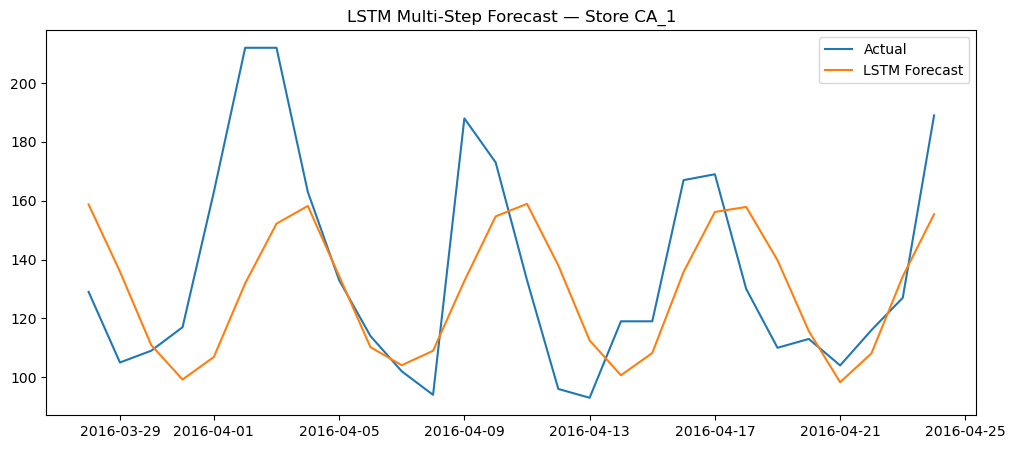

In [152]:
import matplotlib.pyplot as plt

dates = store_lstm["date"].iloc[-FORECAST_HORIZON:]

plt.figure(figsize=(12, 5))
plt.plot(dates, actual_sales, label="Actual")
plt.plot(dates, forecast_sales, label="LSTM Forecast")
plt.legend()
plt.title(f"LSTM Multi-Step Forecast — Store {STORE_ID}")
plt.show()


# HIERARCHICAL FORECAST RECONCILIATION

Prepare Base Forecasts (Bottom Level = Store)

In [154]:
# ================================
# BASE HIERARCHICAL DATA
# ================================

hierarchy_df = (
    sales_features
    .groupby(["date", "state_id", "store_id"], as_index=False)
    .agg({"sales": "sum"})
)

hierarchy_df.head()

,date,state_id,store_id,sales
0,2011-02-26,CA,CA_1,75
1,2011-02-26,CA,CA_2,117
2,2011-02-27,CA,CA_1,95
3,2011-02-27,CA,CA_2,73
4,2011-02-28,CA,CA_1,46


In [155]:
FORECAST_HORIZON = 28
last_date = hierarchy_df["date"].max()

train_df = hierarchy_df[hierarchy_df["date"] <= last_date - pd.Timedelta(days=FORECAST_HORIZON)]
test_df  = hierarchy_df[hierarchy_df["date"] > last_date - pd.Timedelta(days=FORECAST_HORIZON)]

Generate BASE Store-Level Forecasts (Naïve but Valid)

In [156]:
# ================================
# STORE-LEVEL NAIVE FORECAST
# ================================

store_forecasts = []

for store, df_store in train_df.groupby("store_id"):
    last_sales = df_store.sort_values("date")["sales"].iloc[-1]
    future_dates = test_df["date"].unique()

    for d in future_dates:
        store_forecasts.append({
            "date": d,
            "store_id": store,
            "forecast": last_sales
        })

store_forecast_df = pd.DataFrame(store_forecasts)
store_forecast_df.head()


,date,store_id,forecast
0,2016-03-28,CA_1,114
1,2016-03-29,CA_1,114
2,2016-03-30,CA_1,114
3,2016-03-31,CA_1,114
4,2016-04-01,CA_1,114


Bottom-Up Reconciliation

In [157]:
# ================================
# BOTTOM-UP RECONCILIATION
# ================================

# Merge state info
store_forecast_df = store_forecast_df.merge(
    hierarchy_df[["store_id", "state_id"]].drop_duplicates(),
    on="store_id",
    how="left"
)

# State-level
state_forecast = (
    store_forecast_df
    .groupby(["date", "state_id"], as_index=False)
    .agg({"forecast": "sum"})
)

# Total-level
total_forecast = (
    store_forecast_df
    .groupby("date", as_index=False)
    .agg({"forecast": "sum"})
)

state_forecast.head(), total_forecast.head()


(        date state_id  forecast
 0 2016-03-28       CA       325
 1 2016-03-29       CA       325
 2 2016-03-30       CA       325
 3 2016-03-31       CA       325
 4 2016-04-01       CA       325,
         date  forecast
 0 2016-03-28       325
 1 2016-03-29       325
 2 2016-03-30       325
 3 2016-03-31       325
 4 2016-04-01       325)

In [160]:
# ================================
# STORE-LEVEL HISTORICAL PROPORTIONS
# ================================

store_proportions = (
    train_df
    .groupby("store_id", as_index=False)
    .agg({"sales": "sum"})
)

store_proportions["proportion"] = (
    store_proportions["sales"] /
    store_proportions["sales"].sum()
)

# Safety check
assert np.isclose(store_proportions["proportion"].sum(), 1.0)

store_proportions.head()


,store_id,sales,proportion
0,CA_1,202724,0.557415
1,CA_2,160962,0.442585


Top-Down Reconciliation

In [163]:
# ================================
# TOTAL-LEVEL FORECAST
# ================================

total_train = (
    train_df
    .groupby("date", as_index=False)
    .agg({"sales": "sum"})
)

last_total = total_train["sales"].iloc[-1]

top_down_forecast = pd.DataFrame({
    "date": test_df["date"].unique(),
    "forecast": last_total
})


In [165]:
# ================================
# TOP-DOWN STORE FORECAST
# ================================

topdown_store_forecast = (
    top_down_forecast
    .assign(key=1)
    .merge(store_proportions.assign(key=1), on="key")
    .drop("key", axis=1)
)

topdown_store_forecast["forecast"] = (
    topdown_store_forecast["forecast"] *
    topdown_store_forecast["proportion"]
)

topdown_store_forecast.head()


,date,forecast,store_id,sales,proportion
0,2016-03-28,181.159847,CA_1,202724,0.557415
1,2016-03-28,143.840153,CA_2,160962,0.442585
2,2016-03-29,181.159847,CA_1,202724,0.557415
3,2016-03-29,143.840153,CA_2,160962,0.442585
4,2016-03-30,181.159847,CA_1,202724,0.557415


In [166]:
comparison = store_forecast_df.merge(
    topdown_store_forecast[["date", "store_id", "forecast"]],
    on=["date", "store_id"],
    suffixes=("_bottom_up", "_top_down")
)

comparison.head()

,date,store_id,forecast_bottom_up,state_id,forecast_top_down
0,2016-03-28,CA_1,114,CA,181.159847
1,2016-03-29,CA_1,114,CA,181.159847
2,2016-03-30,CA_1,114,CA,181.159847
3,2016-03-31,CA_1,114,CA,181.159847
4,2016-04-01,CA_1,114,CA,181.159847


# Collect Metrics from All Models

Baseline (Naïve)

In [168]:
# ================================
# BASELINE SUMMARY (FROM CV)
# ================================

baseline_summary = pd.DataFrame({
    "Model": ["Naive Baseline"],
    "MAE": [cv_results_df["MAE"].mean()],
    "RMSE": [cv_results_df["RMSE"].mean()],
    "sMAPE": [cv_results_df["sMAPE"].mean()]
})

baseline_summary


,Model,MAE,RMSE,sMAPE
0,Naive Baseline,1.096119,2.428709,72.179923


XGBoost

In [170]:
xgb_summary = pd.DataFrame({
    "Model": ["XGBoost"],
    "MAE": [xgb_results_df["MAE"].mean()],
    "RMSE": [xgb_results_df["RMSE"].mean()],
    "sMAPE": [np.nan]
})

xgb_summary

,Model,MAE,RMSE,sMAPE
0,XGBoost,0.872616,1.753199,NaN


SARIMAX

In [172]:
sarima_summary = pd.DataFrame({
    "Model": ["SARIMAX"],
    "MAE": [sarima_mae],
    "RMSE": [sarima_rmse],
    "sMAPE": [np.nan]
})

sarima_summary

,Model,MAE,RMSE,sMAPE
0,SARIMAX,271.777445,128908.322196,NaN


LSTM

In [173]:
lstm_summary = pd.DataFrame({
    "Model": ["LSTM"],
    "MAE": [lstm_mae],
    "RMSE": [lstm_rmse],
    "sMAPE": [np.nan]
})

lstm_summary

,Model,MAE,RMSE,sMAPE
0,LSTM,23.297443,30.655418,NaN


Final Comparison

In [176]:
final_results = pd.concat(
    [
        baseline_summary,
        xgb_summary,
        lstm_summary
    ],
    ignore_index=True
)

final_results = final_results.sort_values("RMSE")
final_results

,Model,MAE,RMSE,sMAPE
1,XGBoost,0.872616,1.753199,NaN
0,Naive Baseline,1.096119,2.428709,72.179923
2,LSTM,23.297443,30.655418,NaN


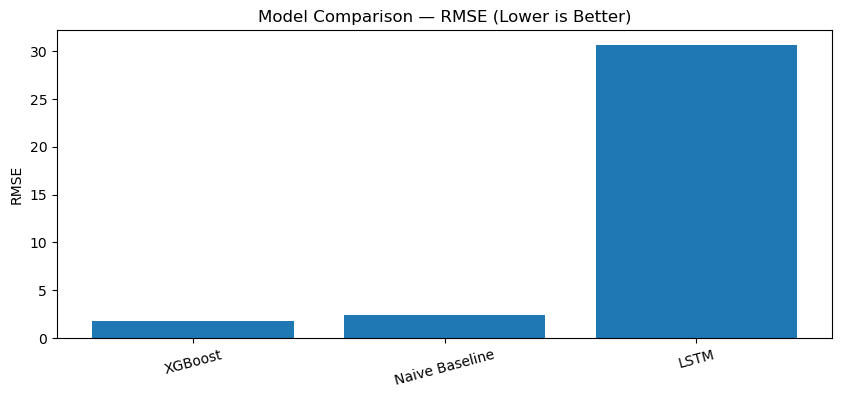

In [177]:
plt.figure(figsize=(10, 4))
plt.bar(final_results["Model"], final_results["RMSE"])
plt.title("Model Comparison — RMSE (Lower is Better)")
plt.ylabel("RMSE")
plt.xticks(rotation=15)
plt.show()


In [ ]:
!pip install nbconvert pdfkit

In [189]:
import subprocess
import pdfkit
from pathlib import Path

notebook_path = Path(
    r"C:\Users\murar\Python Projects\Walmart Sales Forecasting\Walmart_Sales.ipynb"
)

html_path = notebook_path.with_suffix(".html")
pdf_path = notebook_path.with_suffix(".pdf")

# Step 1: ipynb → HTML
subprocess.run([
    "jupyter",
    "nbconvert",
    "--to",
    "html",
    str(notebook_path)
], check=True)

# Step 2: HTML → PDF (manual path)
config = pdfkit.configuration(
    wkhtmltopdf=r"C:\Program Files\wkhtmltopdf\bin\wkhtmltopdf.exe"
)

pdfkit.from_file(str(html_path), str(pdf_path), configuration=config)

print("PDF created successfully:", pdf_path)


PDF created successfully: C:\Users\murar\Python Projects\Walmart Sales Forecasting\Walmart_Sales.pdf
